In [27]:
import pandas as pd

# Leer el archivo CSV limpio
df_clean = pd.read_csv('C:/Users/sergi/Proyectos/Proyecto_Final/data/processed/vehicles_clean.csv',quotechar='"')

# Mostrar las primeras filas del DataFrame
print(df_clean.head())

   region  price    year manufacturer                     model  condition  \
0  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
1  auburn  22590  2010.0    chevrolet            silverado 1500       good   
2  auburn  39590  2020.0    chevrolet       silverado 1500 crew       good   
3  auburn  30990  2017.0       toyota      tundra double cab sr       good   
4  auburn  15000  2013.0         ford                 f-150 xlt  excellent   

  fuel  odometer transmission drive       size    type paint_color state  \
0  gas   57923.0        other   4wd        NaN  pickup       white    al   
1  gas   71229.0        other   4wd  full-size  pickup        blue    al   
2  gas   19160.0        other   4wd        NaN  pickup         red    al   
3  gas   41124.0        other   4wd  full-size  pickup         red    al   
4  gas  128000.0    automatic   rwd  full-size   truck       black    al   

      lat     long  
0  32.590 -85.4800  
1  32.590 -85.4800  
2  32.590 -

In [28]:
nulos = df_clean.isnull().sum()
nulos

region               0
price                0
year                 0
manufacturer         0
model                0
condition       144073
fuel                 0
odometer             0
transmission         0
drive                0
size             51794
type                 0
paint_color     104416
state                0
lat                  0
long                 0
dtype: int64

C:\Users\sergi\AppData\Local\Temp\ipykernel_20384\2178461404.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regiones['region'] = pd.Categorical(df_regiones['region'], categories=regiones_top, ordered=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_20384\2178461404.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manu['manufacturer'] = pd.Categorical(df_manu['manufacturer'], categories=manufacturer_top, ordered=True)


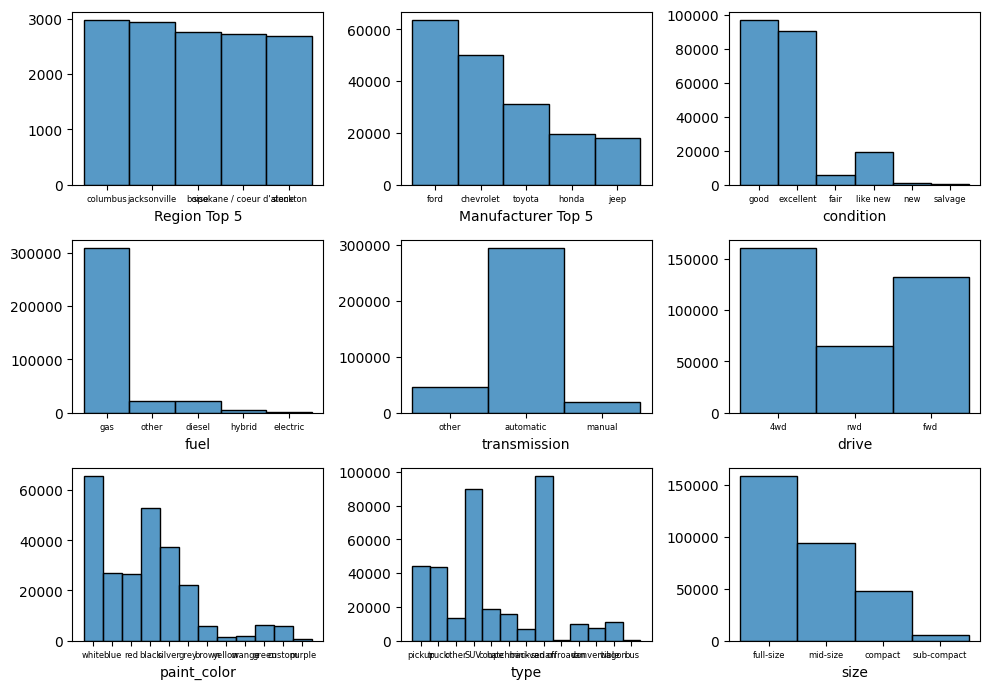

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular la frecuencia de cada región y seleccionar las 10 primeras
regiones_top = df_clean['region'].value_counts().nlargest(5).index
manufacturer_top = df_clean['manufacturer'].value_counts().nlargest(5).index


# Filtrar el DataFrame original para incluir solo estas 10 regiones y ordenarlas
df_regiones = df_clean[df_clean['region'].isin(regiones_top)]
df_regiones['region'] = pd.Categorical(df_regiones['region'], categories=regiones_top, ordered=True)
df_manu = df_clean[df_clean['manufacturer'].isin(manufacturer_top)]
df_manu['manufacturer'] = pd.Categorical(df_manu['manufacturer'], categories=manufacturer_top, ordered=True)

fig, axis = plt.subplots(3, 3, figsize=(10, 7))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=df_regiones, x="region").set(ylabel=None, xlabel = "Region Top 5")
sns.histplot(ax=axis[0, 1], data=df_manu, x="manufacturer").set(ylabel=None, xlabel = "Manufacturer Top 5")
sns.histplot(ax=axis[0, 2], data=df_clean, x="condition").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df_clean, x="fuel").set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=df_clean, x="transmission").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df_clean, x="drive").set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=df_clean, x="paint_color").set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=df_clean, x="type").set(ylabel=None)
sns.histplot(ax=axis[2, 2], data=df_clean, x="size").set(ylabel=None)

# Ajustar el tamaño de la letra de la leyenda en el eje x
for i, ax in enumerate(axis.flat):
        ax.tick_params(axis='x', labelsize=6)  # Cambia el valor de 'labelsize' según necesites

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


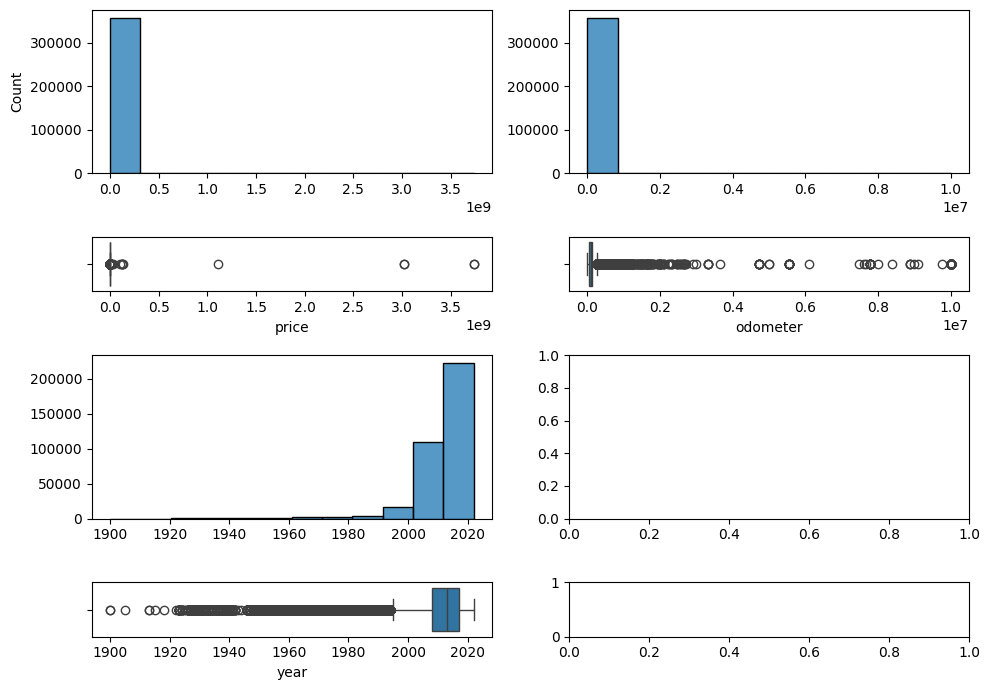

In [30]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [3, 1,3,1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_clean, x = "price", bins = 12).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_clean, x = "price")
sns.histplot(ax = axis[0, 1], data = df_clean, x = "odometer", bins = 12).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_clean, x = "odometer")
sns.histplot(ax = axis[2, 0], data = df_clean, x = "year", bins = 12).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df_clean, x = "year")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


In [31]:
df_clean.shape

(357925, 16)

In [32]:
# Eliminar outliers del df_clean
df_clean = df_clean[df_clean['price'] <= 52000]
df_clean = df_clean[df_clean['odometer'] <= 250000]
df_clean = df_clean[df_clean['year'] > 1996]

nulos2 = df_clean.isnull().sum()
nulos2

region               0
price                0
year                 0
manufacturer         0
model                0
condition       133866
fuel                 0
odometer             0
transmission         0
drive                0
size             49014
type                 0
paint_color      96732
state                0
lat                  0
long                 0
dtype: int64

In [33]:
df_clean.shape

(332140, 16)

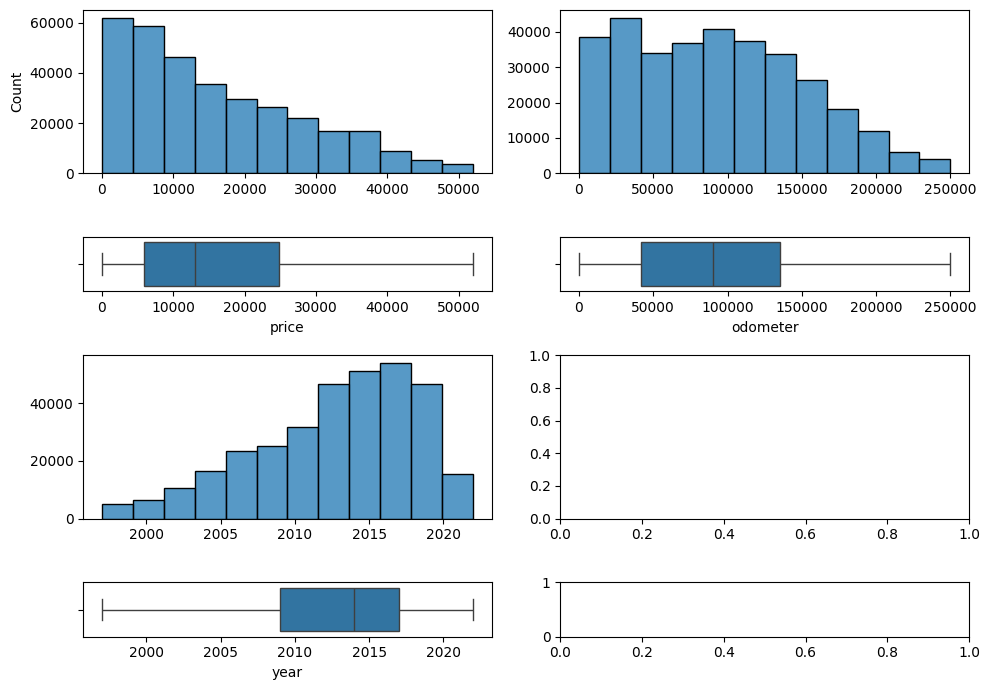

In [34]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [3, 1,3,1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_clean, x = "price", bins = 12).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_clean, x = "price")
sns.histplot(ax = axis[0, 1], data = df_clean, x = "odometer", bins = 12).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_clean, x = "odometer")
sns.histplot(ax = axis[2, 0], data = df_clean, x = "year", bins = 12).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df_clean, x = "year")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

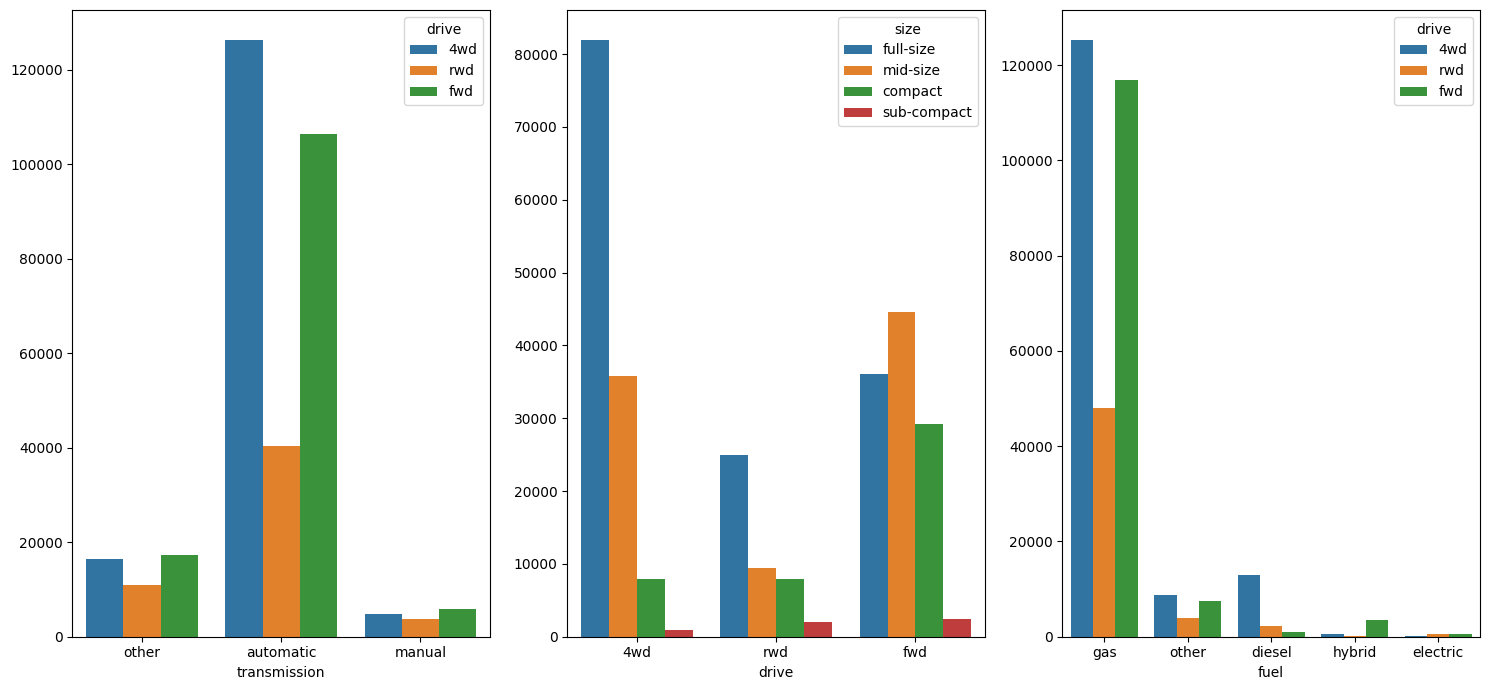

In [35]:
# Análisis categórico-categórico

fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.countplot(ax = axis[0], data = df_clean, x = "transmission", hue = "drive").set(ylabel = None)
sns.countplot(ax = axis[1], data = df_clean, x = "drive", hue = "size").set(ylabel = None)
sns.countplot(ax = axis[2], data = df_clean, x = "fuel", hue = "drive").set(ylabel = None)

plt.tight_layout()
plt.show()

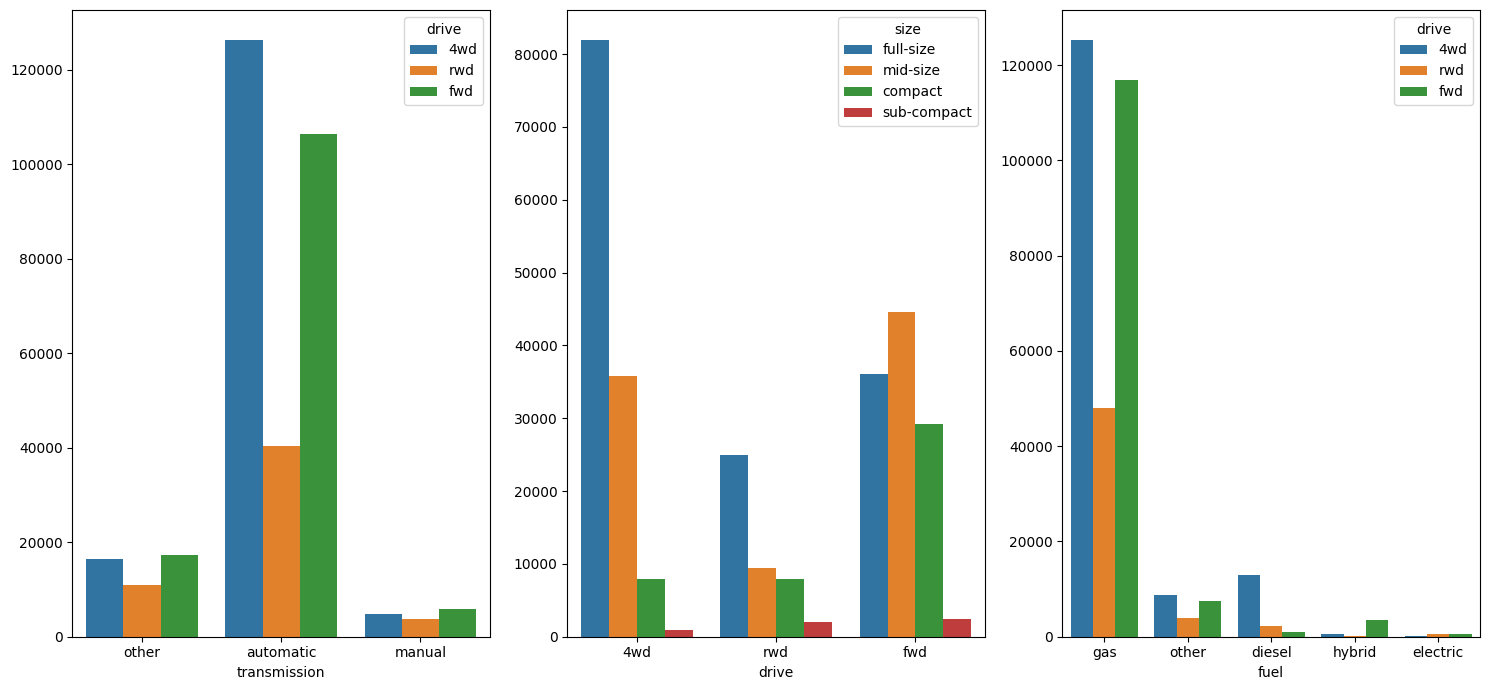

In [36]:
# Análisis categórico-categórico

fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.countplot(ax = axis[0], data = df_clean, x = "transmission", hue = "drive").set(ylabel = None)
sns.countplot(ax = axis[1], data = df_clean, x = "drive", hue = "size").set(ylabel = None)
sns.countplot(ax = axis[2], data = df_clean, x = "fuel", hue = "drive").set(ylabel = None)

plt.tight_layout()
plt.show()

In [37]:
# Agrupar los datos por estado y calcular los valores más comunes en cada grupo
state_stats = df_clean.groupby('state').agg({
    'manufacturer': lambda x: x.value_counts().index[0],
    'model': lambda x: x.value_counts().index[0],
    'fuel': lambda x: x.value_counts().index[0],
    'type': lambda x: x.value_counts().index[0],
    'size': lambda x: x.value_counts().index[0],
    'paint_color': lambda x: x.value_counts().index[0]
}).reset_index()

# Mostrar la tabla
print(state_stats)

state_stats.to_csv('C:/Users/sergi/Proyectos/Proyecto_Final/data/processed/state_stats.csv')


   state manufacturer           model fuel    type       size paint_color
0     ak    chevrolet           f-150  gas     SUV  full-size       white
1     al         ford           f-150  gas   sedan  full-size       white
2     ar    chevrolet  silverado 1500  gas     SUV  full-size       white
3     az         ford           f-150  gas   sedan  full-size       white
4     ca         ford           f-150  gas   sedan  full-size       white
5     co         ford           f-150  gas     SUV  full-size       white
6     ct         ford        forester  gas   sedan  full-size       black
7     dc       toyota           camry  gas   sedan  full-size       black
8     de         ford           focus  gas   sedan  full-size       white
9     fl         ford           f-150  gas   sedan  full-size       white
10    ga         ford           f-150  gas   sedan  full-size       white
11    hi       toyota          tacoma  gas   sedan  full-size       white
12    ia         ford           f-150 

In [38]:
# Leer el archivo con los top de cada region
df_state = pd.read_csv('C:/Users/sergi/Proyectos/Proyecto_Final/data/processed/state_stats.csv',quotechar='"')



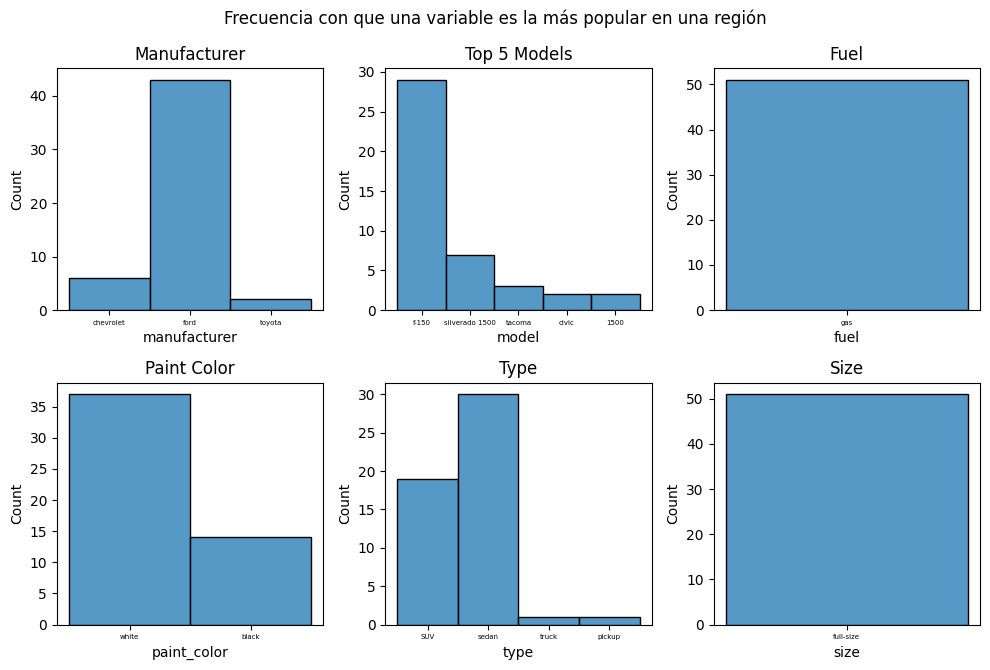

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los 5 modelos más populares
top_5_models = df_state['model'].value_counts().head(5).index
df_top_5_models = df_state[df_state['model'].isin(top_5_models)]

# Crear una figura con subplots
fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Crear histogramas
sns.histplot(ax=axis[0, 0], data=df_state, x="manufacturer").set_title("Manufacturer")
sns.histplot(ax=axis[0, 1], data=df_top_5_models, x="model").set_title("Top 5 Models")
sns.histplot(ax=axis[0, 2], data=df_state, x="fuel").set_title("Fuel")
sns.histplot(ax=axis[1, 0], data=df_state, x="paint_color").set_title("Paint Color")
sns.histplot(ax=axis[1, 1], data=df_state, x="type").set_title("Type")
sns.histplot(ax=axis[1, 2], data=df_state, x="size").set_title("Size")

# Ajustar el tamaño de la letra de la leyenda en el eje x
for ax in axis.flat:
    ax.tick_params(axis='x', labelsize=5)  # Cambia el valor de 'labelsize' según necesites

# Ajustar el layout con más espacio en la parte superior para el título
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Agregar un título para todo el grupo de gráficos
fig.suptitle("Frecuencia con que una variable es la más popular en una región", fontsize=12)

# Mostrar el plot
plt.show()


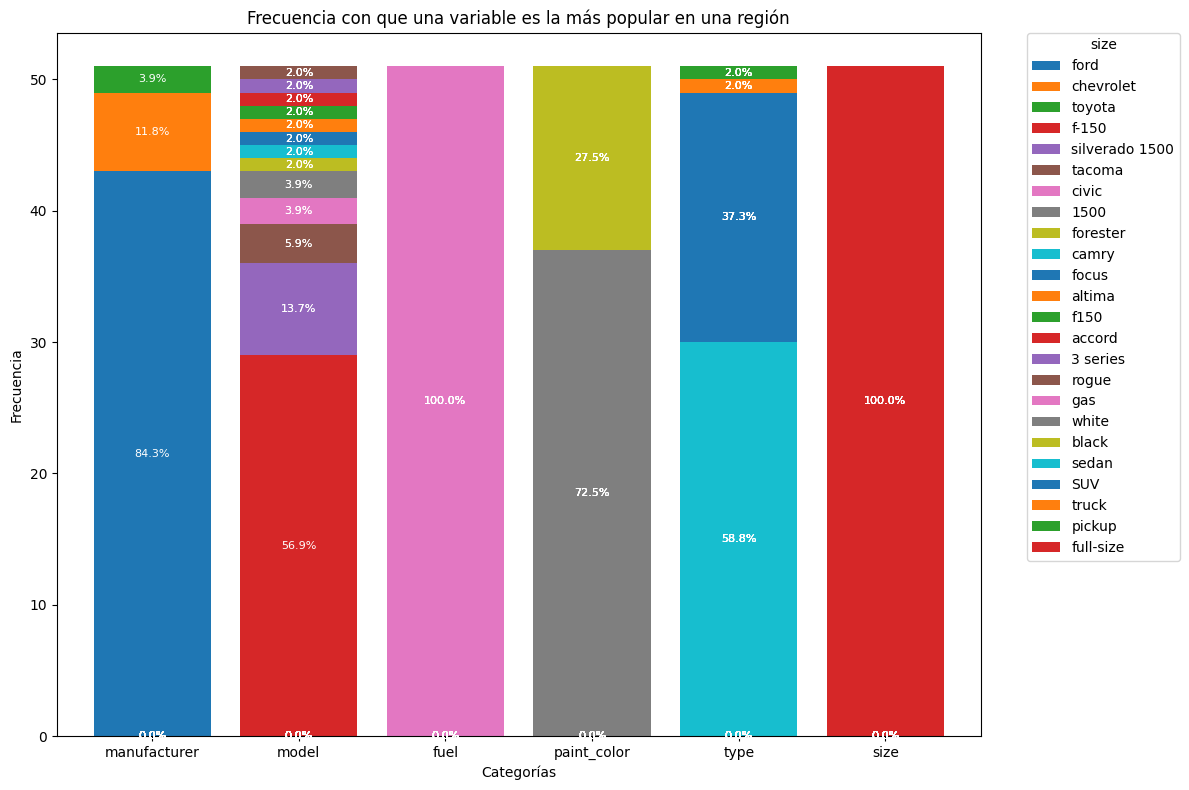

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame vacío para almacenar los conteos
df_counts = pd.DataFrame()

# Calcular la frecuencia de cada valor dentro de cada categoría y agregarlo al DataFrame
categories = ['manufacturer', 'model', 'fuel', 'paint_color', 'type', 'size']

for category in categories:
    counts = df_state[category].value_counts()
    counts.name = category
    df_counts = pd.concat([df_counts, counts], axis=1)

# Reemplazar NaN con 0
df_counts = df_counts.fillna(0)

# Calcular porcentajes y crear el gráfico de barras apiladas
ax = df_counts.T.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.8)

# Añadir porcentajes dentro de las barras
for col in df_counts.columns:
    total_col = df_counts[col].sum()
    for p in ax.patches[df_counts.columns.get_loc(col) * len(df_counts.index):]:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height / total_col * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

# Ajustar las etiquetas y el título
plt.xticks(rotation=0, fontsize=10)
plt.xlabel("Categorías")
plt.ylabel("Frecuencia")
plt.title("Frecuencia con que una variable es la más popular en una región")

# Crear leyendas individuales para cada columna
for i, category in enumerate(categories):
    plt.legend(df_counts.index, title=category, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1, fancybox=True)

plt.tight_layout()
plt.show()


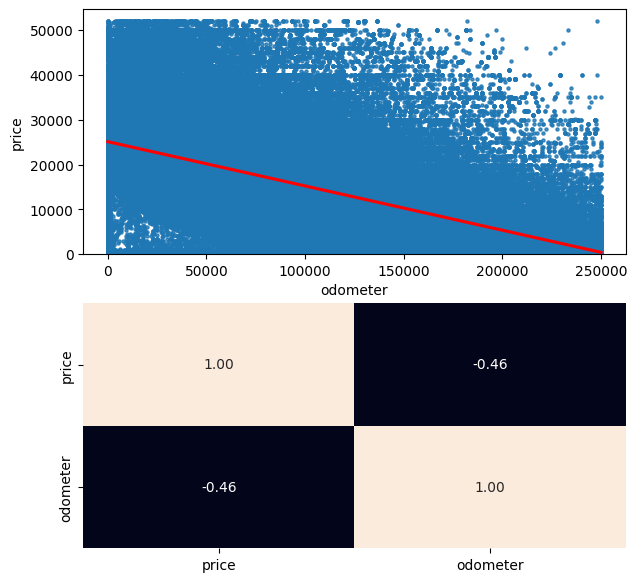

In [41]:
# Análisis numérico-numérico

fig, axis = plt.subplots(2,1, figsize = (7, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax=axis[0], data=df_clean, x="odometer", y="price", scatter_kws={'s': 5},line_kws={'color': 'red'})
sns.heatmap(df_clean[["price", "odometer"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)


# Ajustar el layout
axis[0].set_ylim(bottom=0)

# Mostrar el plot
plt.show()


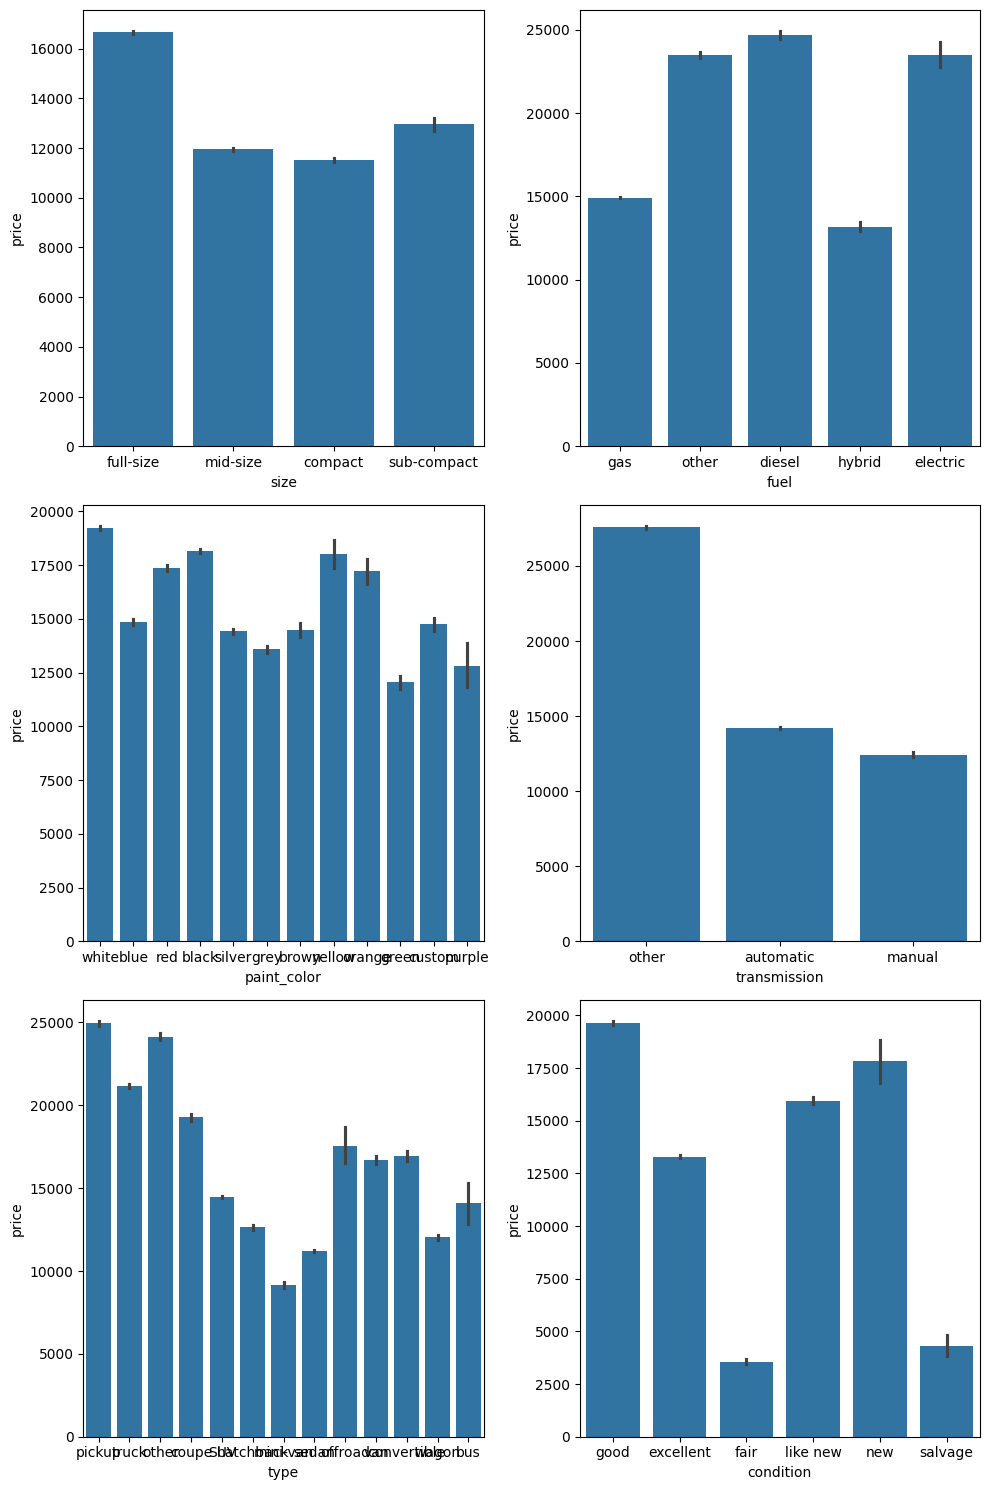

In [42]:
# Analisis Multivariable

fig, axis = plt.subplots(3, 2, figsize=(10, 15))

sns.barplot(ax=axis[0, 0], data=df_clean, x="size", y="price")
sns.barplot(ax=axis[0, 1], data=df_clean, x="fuel", y="price")
sns.barplot(ax=axis[1, 0], data=df_clean, x="paint_color", y="price")
sns.barplot(ax=axis[1, 1], data=df_clean, x="transmission", y="price")
sns.barplot(ax=axis[2, 0], data=df_clean, x="type", y="price")
sns.barplot(ax=axis[2, 1], data=df_clean, x="condition", y="price")

# Ajustar el layout
plt.tight_layout()

plt.show()


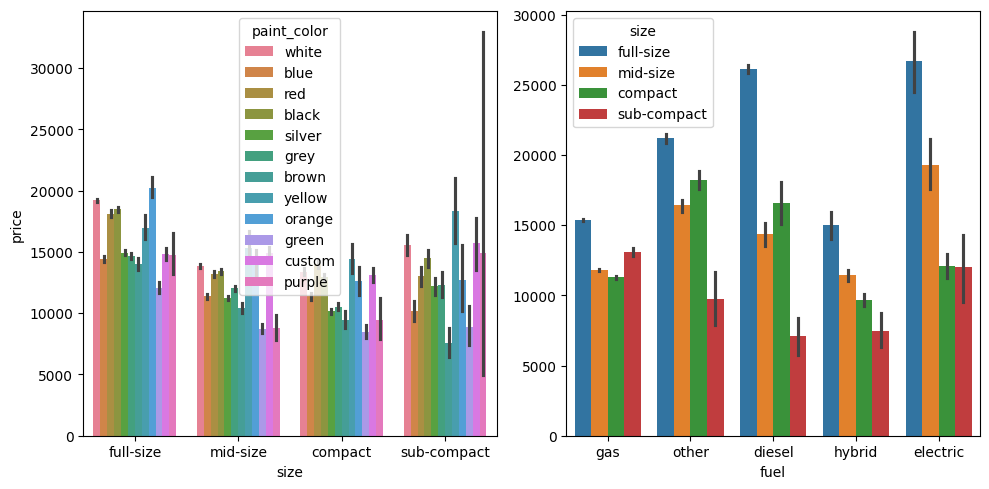

In [43]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df_clean, x = "size", y = "price", hue = "paint_color")
sns.barplot(ax = axis[1], data = df_clean, x = "fuel", y = "price", hue = "size").set(ylabel = None)

plt.tight_layout()

plt.show()

In [44]:
# De las columnas con valores Null, se eliminan paint_color y condition por su bajor valor predictivo.
# Se elimina region por su alta correlacion con state
# Se eliminan los registros size nulo, ya que la columna tiene mayor valor predictivo

# Eliminar columnas
columnas_eliminar = ["paint_color","condition", "region"]
df_clean = df_clean.drop(columns = columnas_eliminar)
df_clean = df_clean.dropna(subset=['size'])

nulos = df_clean.isnull().sum()
nulos


price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
state           0
lat             0
long            0
dtype: int64

In [45]:
df_clean.shape

(283126, 13)

In [46]:
# vehicles_clean2 contiene la informacion sin la columna eliminadas en esta etapa, y con los outliers eliminados

df_clean.to_csv("C:\\Users\\sergi\\Proyectos\\Proyecto_Final\\data\\processed\\vehicles_clean2.csv", index=False)